In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
loopback = {
    512: 93862764602,
    1024: 47574866794,
    2048: 24085300222,
    4096: 12725120764,
    8192: 6853316472,
    16384: 3814520332,
    32768: 2259765252,
    64000: 1485894694
}

remote = {
    512: 482213552920,
    1024: 240096127564,
    2048: 157979175924,
    4096: 41424881802,
    8192: 44187912522,
    16384: 20937482922,
    32768: 7432095800,
    64000: 3480024486
}

df_loopback = pd.DataFrame.from_dict(loopback, orient='index', columns=['n_cycles'])
df_remote = pd.DataFrame.from_dict(remote, orient='index', columns=['n_cycles'])

In [15]:
cycles_per_sec = 3118588000 #3.118588 Mhz
df_loopback['seconds'] = df_loopback['n_cycles'] / cycles_per_sec
df_remote['seconds'] = df_remote['n_cycles'] / cycles_per_sec

In [36]:
df_loopback['bandwidth'] = 2**30 / df_loopback['seconds'] / 1e6
df_remote['bandwidth'] = 2**30 / df_remote['seconds'] / 1e6

In [ ]:
df_loopback['bandwidth'] = 2**30 / df_loopback['seconds'] / 1e6
df_remote['bandwidth'] = 2**30 / df_remote['seconds'] / 1e6

In [37]:
df_remote

,n_cycles,seconds,bandwidth
512,482213552920,154.625604,6.944140
1024,240096127564,76.988729,13.946740
2048,157979175924,50.657277,21.196201
4096,41424881802,13.283217,80.834470
8192,44187912522,14.169205,75.779963
16384,20937482922,6.713770,159.931276
32768,7432095800,2.383161,450.553714
64000,3480024486,1.115897,962.222646


In [73]:
df_loopback

,n_cycles,seconds,bandwidth
512,93862764602,30.097841,35.675045
1024,47574866794,15.255259,70.385029
2048,24085300222,7.723143,139.029131
4096,12725120764,4.080411,263.145508
8192,6853316472,2.197570,488.604077
16384,3814520332,1.223156,877.845201
32768,2259765252,0.724612,1481.816912
64000,1485894694,0.476464,2253.563715


Text(0.5, 1.0, 'Time to Transmit Full Payload')

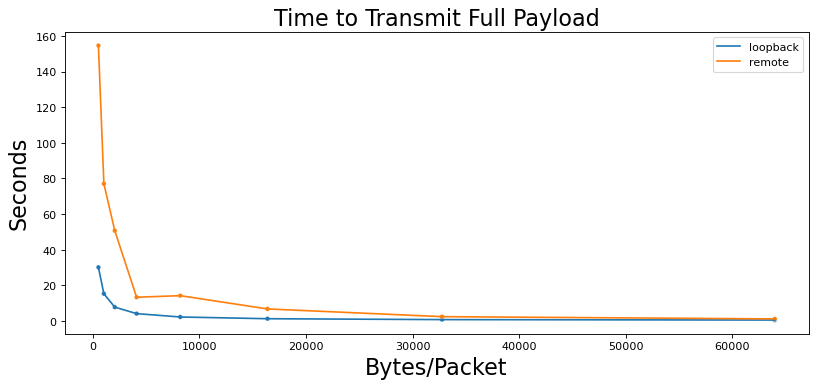

In [72]:
plt.figure(figsize=(12, 5), dpi=80)

sns.lineplot(x=df_loopback.index, y=df_loopback.seconds, label='loopback')
sns.lineplot(x=df_remote.index, y=df_remote.seconds, label='remote')

lb = sns.scatterplot(x=df_loopback.index, y=df_loopback.seconds, size = 20, data = df_loopback)
rm = sns.scatterplot(x=df_remote.index, y=df_remote.seconds, size = 20, data = df_remote)

plt.legend(['loopback','remote'])

plt.ylabel('Seconds', fontsize=20)
plt.xlabel('Bytes/Packet', fontsize=20)
plt.title('Time to Transmit Full Payload', fontsize=20)

Text(0.5, 1.0, 'Bandwidth By Payload Size')

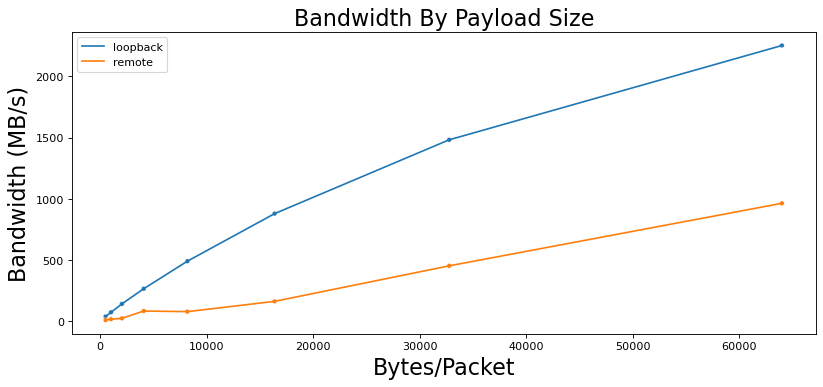

In [70]:
plt.figure(figsize=(12, 5), dpi=80)

sns.lineplot(x=df_loopback.index, y=df_loopback.bandwidth, label='loopback')
sns.lineplot(x=df_remote.index, y=df_remote.bandwidth, label='remote')

lb = sns.scatterplot(x=df_loopback.index, y=df_loopback.bandwidth, size = 20, data = df_loopback)
rm = sns.scatterplot(x=df_remote.index, y=df_remote.bandwidth, size = 20, data = df_remote)

plt.legend(['loopback','remote'])

plt.ylabel('Bandwidth (MB/s)', fontsize=20)
plt.xlabel('Bytes/Packet', fontsize=20)
plt.title('Bandwidth By Payload Size', fontsize=20)